<a href="https://colab.research.google.com/github/LeibGit/-DI_Bootcamp/blob/main/Copy_of_Student_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Traffic Data Analysis - Student Exercise
## Inferential Statistics and Regression Analysis

**Student Template - Complete the TODO sections**

In this exercise, you will analyze air traffic data using inferential statistics and regression techniques. Follow the instructions and complete each section marked with `#TODO`.

### Dataset Description:
- **Dom_Pax**: Domestic Air Travel Passengers
- **Int_Pax**: International Air Travel Passengers  
- **Pax**: Total Air Travel Passengers
- **Dom_Flt**: Number of Flights (Domestic)
- **Int_Flt**: Number of Flights (International)
- **Flt**: Number of Flights (Total)
- **Dom_RPM**: Revenue Passenger-miles (Domestic)

## 1. Setup and Data Loading

In [ ]:
# TODO: Import necessary libraries
# Hint: You'll need pandas, numpy, matplotlib, seaborn, scipy.stats, and sklearn modules
# Import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
# From scipy import stats
# From sklearn.model_selection import train_test_split
# From sklearn.linear_model import LinearRegression
# From sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# From sklearn.preprocessing import StandardScaler

# Your code here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Set up plotting style (optional)
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
# TODO: Load the dataset
# Hint: Use pd.read_csv() to load 'air_traffic_data.csv'
# If the file doesn't exist, the code below will create sample data for you

try:
    # Your code to load the dataset:
    df = pd.read_csv("air_traffifc_data.csv")
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print("Creating sample air traffic data...")
    import numpy as np
    import pandas as pd

    # Create sample data
    np.random.seed(42)
    n_samples = 200

    # Generate correlated data
    dom_flights = np.random.normal(15000, 3000, n_samples)
    int_flights = np.random.normal(8000, 2000, n_samples)

    dom_pax = dom_flights * np.random.normal(12, 2, n_samples) + np.random.normal(0, 10000, n_samples)
    int_pax = int_flights * np.random.normal(15, 3, n_samples) + np.random.normal(0, 15000, n_samples)

    dom_rpm = dom_pax * np.random.normal(800, 100, n_samples)

    # Ensure positive values
    dom_flights = np.abs(dom_flights)
    int_flights = np.abs(int_flights)
    dom_pax = np.abs(dom_pax)
    int_pax = np.abs(int_pax)
    dom_rpm = np.abs(dom_rpm)

    df = pd.DataFrame({
        'Dom_Flt': dom_flights.astype(int),
        'Int_Flt': int_flights.astype(int),
        'Flt': (dom_flights + int_flights).astype(int),
        'Dom_Pax': dom_pax.astype(int),
        'Int_Pax': int_pax.astype(int),
        'Pax': (dom_pax + int_pax).astype(int),
        'Dom_RPM': dom_rpm.astype(int)
    })

    print("Sample data created successfully!")
    print(f"Shape: {df.shape}")

Creating sample air traffic data...
Sample data created successfully!
Shape: (200, 7)


## 2. Exploratory Data Analysis

In [ ]:
# TODO: Display basic information about the dataset
# Hint: Use df.info(), df.head(), and df.describe() to explore the data

print(f"Dataset Info: {df.info()}")


print(f"\nFirst 5 rows: {df.head()}")


print(f"\nBasic Statistics: {df.describe()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Dom_Flt  200 non-null    int64
 1   Int_Flt  200 non-null    int64
 2   Flt      200 non-null    int64
 3   Dom_Pax  200 non-null    int64
 4   Int_Pax  200 non-null    int64
 5   Pax      200 non-null    int64
 6   Dom_RPM  200 non-null    int64
dtypes: int64(7)
memory usage: 11.1 KB
Dataset Info: None

First 5 rows:    Dom_Flt  Int_Flt    Flt  Dom_Pax  Int_Pax     Pax    Dom_RPM
0    16490     8715  25205   152866   176257  329123  124207802
1    14585     9121  23706   148316   136571  284888  112284645
2    16943    10166  27109   212190   156317  368508  172347465
3    19569    10107  29676   250224   127892  378116  213773981
4    14297     5244  19542   162835    82306  245142  131063749

Basic Statistics:             Dom_Flt       Int_Flt           Flt        Dom_Pax        Int_Pax  \
count    200.00

In [ ]:
# TODO: Check for missing values and handle them if necessary
# Hint: Use df.isnull().sum() to check for missing values
# If there are missing values, decide whether to drop them (dropna()) or fill them (fillna())

print(f"Missing values: {df.isnull().sum()}")



# Handle missing values if any (uncomment and complete if needed)
if df.isnull().sum().sum() > 0:
  print("\nHandling missing values...")
  df = df.drop()
  print(f"New shape after handling missing values: {df.shape}")

Missing values: Dom_Flt    0
Int_Flt    0
Flt        0
Dom_Pax    0
Int_Pax    0
Pax        0
Dom_RPM    0
dtype: int64


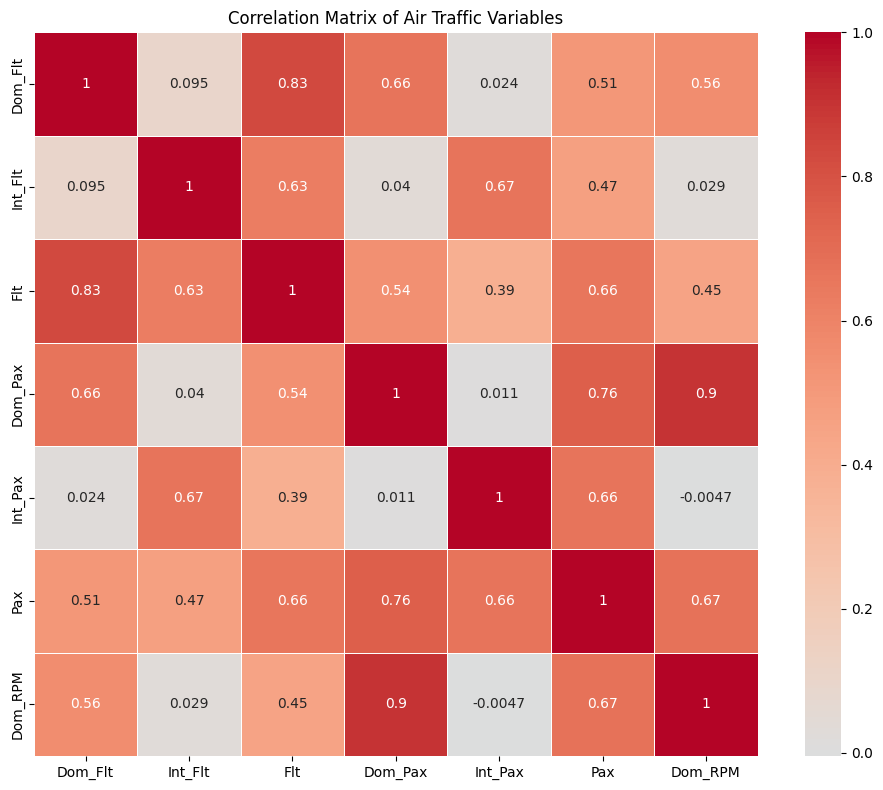

Strongest correlations:
0.9016171312735474
(array([0]),)


/tmp/ipython-input-699809240.py:22: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  strongest_pairs = np.where(np.abs(max_corr) == max_corr)


In [ ]:
# TODO: Create and analyze correlation matrix
# Hint: Use df.corr() to calculate correlations and sns.heatmap() to visualize

plt.figure(figsize=(10, 8))
# Calculate correlation matrix:
correlation_matrix = df.corr()

# Create heatmap:
# TODO: Use sns.heatmap() with parameters: annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Air Traffic Variables')
plt.tight_layout()
plt.show()

# TODO: Find and print the strongest correlations
# Hint: Look at the correlation matrix values (excluding diagonal)
print("Strongest correlations:")
corr_no_diag = correlation_matrix.copy()
np.fill_diagonal(corr_no_diag.values, 0)
max_corr = np.max(corr_no_diag.abs())
strongest_pairs = np.where(np.abs(max_corr) == max_corr)
print(max_corr)
print(strongest_pairs)

In [ ]:
df.columns

Index(['Dom_Flt', 'Int_Flt', 'Flt', 'Dom_Pax', 'Int_Pax', 'Pax', 'Dom_RPM'], dtype='object')

## 3. Hypothesis Testing

In [ ]:
# TODO: Hypothesis Test 1 - Compare domestic and international passengers
# Hint: Use stats.ttest_ind() to perform independent t-test

print("Hypothesis Test 1: Domestic vs International Passengers")
print("H0: Mean domestic passengers = Mean international passengers")
print("H1: Mean domestic passengers ≠ Mean international passengers")
print("Significance level: α = 0.05")

# Perform the t-test:
domestic_passengers = df['Dom_Pax']
international_passengers = df['Int_Pax']
t_stat, p_value = stats.ttest_ind(domestic_passengers, international_passengers)

print(f"\nResults:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

# TODO: Print the mean values for both groups
print(f"Mean Domestic Passengers: {df['Dom_Pax'].mean():.0f}")
print(f"Mean International Passengers: {df['Int_Pax'].mean():.0f}")

# TODO: Interpret the results
# Hint: Compare p_value with alpha (0.05) to make a decision
alpha = 0.05
if p_value < alpha:
    # TODO: Complete the conclusion for rejecting H0
    print(f"\nConclusion: Reject H0 (p < {alpha})")
    print("Reject null hypothesis")
else:
    # TODO: Complete the conclusion for failing to reject H0
    print(f"\nConclusion: Fail to reject H0 (p >= {alpha})")
    print("Accept null hypothesis")

Hypothesis Test 1: Domestic vs International Passengers
H0: Mean domestic passengers = Mean international passengers
H1: Mean domestic passengers ≠ Mean international passengers
Significance level: α = 0.05

Results:
T-statistic: 11.4892
P-value: 0.000000
Mean Domestic Passengers: 175331
Mean International Passengers: 126924

Conclusion: Reject H0 (p < 0.05)
Reject null hypothesis


In [ ]:
# TODO: Hypothesis Test 2 - Test correlation between total passengers and total flights
# Hint: Use stats.pearsonr() to test correlation significance

print("\nHypothesis Test 2: Correlation between Total Passengers and Total Flights")
print("H0: There is no correlation between total passengers and total flights (ρ = 0)")
print("H1: There is a correlation between total passengers and total flights (ρ ≠ 0)")
print("Significance level: α = 0.05")

total_passengers = df['Pax']
total_flights = df['Flt']

# Perform correlation test:
correlation_coef, p_value_corr = stats.pearsonr(total_passengers, total_flights)

print(f"\nResults:")
print(f"Correlation coefficient: {correlation_coef:.4f}")
print(f"P-value: {p_value_corr:.6f}")

# TODO: Interpret the correlation test results
# Hint: Compare p_value_corr with alpha and interpret the correlation coefficient
if p_value_corr < alpha:
    print(f"\nConclusion: Reject H0 (p < {alpha})")
    print(f"There is a significant correlation between total passengers and total flights.")
    # TODO: Add interpretation about positive/negative correlation
    if correlation_coef > 0:
        print("Strong positive relationship")
    else:
        print("No relationship")
else:
    print(f"\nConclusion: Fail to reject H0 (p >= {alpha})")
    print("not statistically significant")


Hypothesis Test 2: Correlation between Total Passengers and Total Flights
H0: There is no correlation between total passengers and total flights (ρ = 0)
H1: There is a correlation between total passengers and total flights (ρ ≠ 0)
Significance level: α = 0.05

Results:
Correlation coefficient: 0.6592
P-value: 0.000000

Conclusion: Reject H0 (p < 0.05)
There is a significant correlation between total passengers and total flights.
Strong positive relationship


## 4. Simple Linear Regression

In [ ]:
# TODO: Build a simple linear regression model
# Goal: Predict Total Passengers from Total Flights
# Hint: Use sklearn's LinearRegression class

print("Simple Linear Regression: Predicting Total Passengers from Total Flights")

# Prepare the data:
X_simple = df[['Flt']]
y_simple = df[['Pax']]

# Split the data:
# TODO: Use train_test_split with test_size=0.2, random_state=42
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple,
    y_simple,
    test_size=0.2,
    random_state=42
)

# Create and train the model:
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)
# TODO: Fit the model using X_train_simple and y_train_simple


# Make predictions:
y_pred_simple = simple_model.predict(X_test_simple)

# TODO: Calculate performance metrics
# Hint: Use r2_score, mean_squared_error, mean_absolute_error
r2_simple = r2_score(y_test_simple, y_pred_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
mae_simple =  mean_absolute_error(y_test_simple, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test_simple, y_pred_simple))

print(f"\nModel Performance:")
print(f"R² Score: {r2_simple:.4f}")
print(f"Mean Squared Error: {mse_simple:.2f}")
print(f"Root Mean Squared Error: {rmse_simple:.2f}")
print(f"Mean Absolute Error: {mae_simple:.2f}")

# TODO: Print the model equation
# Hint: Use simple_model.intercept_ and simple_model.coef_[0]
print(f"\nModel Equation: Passengers = {simple_model.intercept_[0]:.2f} + {simple_model.coef_[0][0]:.2f} × Flights")

Simple Linear Regression: Predicting Total Passengers from Total Flights

Model Performance:
R² Score: 0.2977
Mean Squared Error: 2141846835.14
Root Mean Squared Error: 46280.09
Mean Absolute Error: 36607.08

Model Equation: Passengers = 37484.48 + 11.45 × Flights


/tmp/ipython-input-1350348089.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


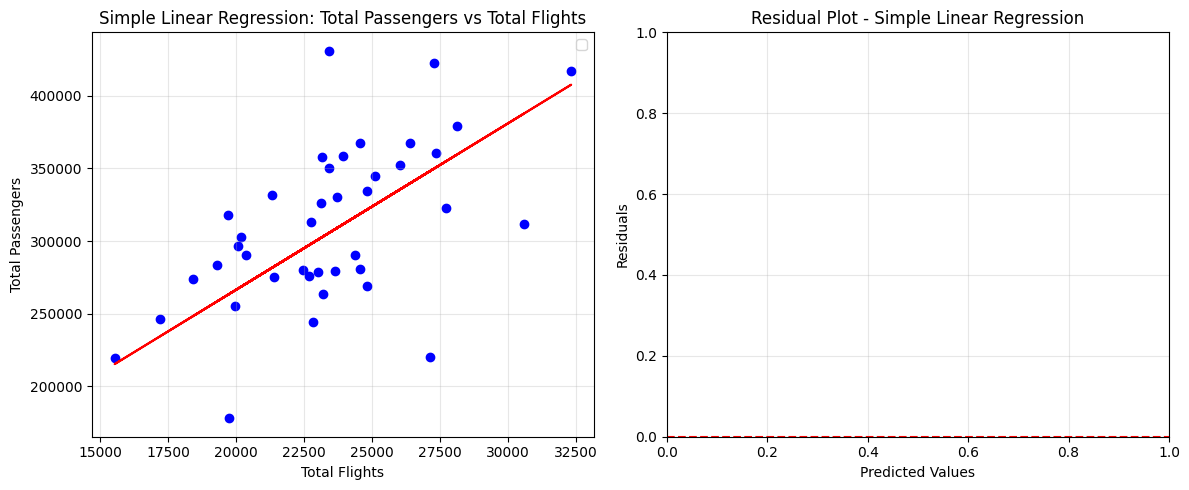

In [ ]:
# TODO: Visualize the simple linear regression results
# Create two plots: scatter plot with regression line and residual plot

# Plot 1: Scatter plot with regression line
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# TODO: Create scatter plot of actual vs predicted values
# Hint: Use plt.scatter() for actual and predicted points, and plt.plot() for the line
plt.scatter(X_test_simple, y_test_simple, color='blue')
plt.plot(X_test_simple, y_pred_simple, color='red')

plt.xlabel('Total Flights')
plt.ylabel('Total Passengers')
plt.title('Simple Linear Regression: Total Passengers vs Total Flights')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residual plot
plt.subplot(1, 2, 2)
# TODO: Calculate residuals and create residual plot
# Hint: residuals = actual - predicted
residuals = y_test_simple - y_pred_simple

# TODO: Create scatter plot of predicted vs residuals
plt.scatter()
plt.plot()
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Simple Linear Regression')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

/tmp/ipython-input-443582487.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


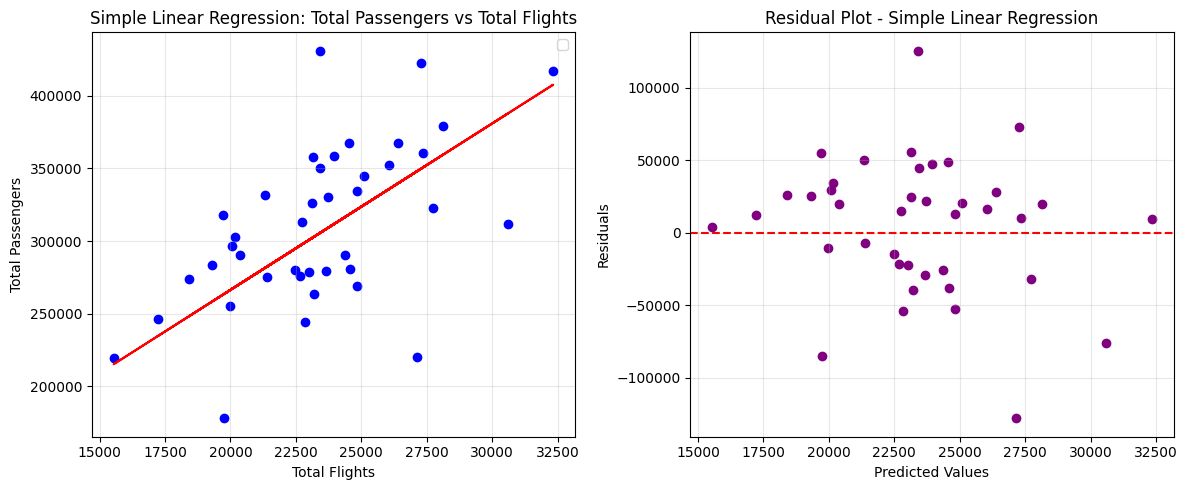

In [ ]:
# TODO: Visualize the simple linear regression results
# Create two plots: scatter plot with regression line and residual plot

# Plot 1: Scatter plot with regression line
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# TODO: Create scatter plot of actual vs predicted values
# Hint: Use plt.scatter() for actual and predicted points, and plt.plot() for the line
plt.scatter(X_test_simple, y_test_simple, color='blue')
plt.plot(X_test_simple, y_pred_simple, color='red')

plt.xlabel('Total Flights')
plt.ylabel('Total Passengers')
plt.title('Simple Linear Regression: Total Passengers vs Total Flights')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residual plot
plt.subplot(1, 2, 2)
# TODO: Calculate residuals and create residual plot
# Hint: residuals = actual - predicted
residuals = y_test_simple - y_pred_simple

# TODO: Create scatter plot of predicted vs residuals

plt.scatter(X_test_simple, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Simple Linear Regression')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Multiple Linear Regression

In [ ]:
# TODO: Build a multiple linear regression model
# Goal: Predict Total Passengers using multiple features
# Hint: Avoid using Pax in features since that's our target (multicollinearity)

print("Multiple Linear Regression: Predicting Total Passengers from Multiple Features")

# TODO: Select appropriate features
# Hint: Use columns like Dom_Pax, Int_Pax, Dom_Flt, Int_Flt, Dom_RPM (avoid Pax and Flt)
feature_names = ['Dom_Pax', 'Dom_Flt', 'Int_Pax', 'Int_Flt', 'Dom_RPM']
X_multiple = df[feature_names]
y_multiple = df['Pax']

print(f"Features used: {feature_names}")
print(f"Target: Total Passengers (Pax)")

# TODO: Split the data
# Hint: Use train_test_split with test_size=0.2, random_state=42
X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(
    X_multiple,
    y_multiple,
    test_size=0.2,
    random_state=42
)

# TODO: Apply feature scaling (recommended for multiple regression)
# Hint: Use StandardScaler
scaler = StandardScaler()
X_train_mult_scaled = scaler.fit_transform(X_train_mult)
X_test_mult_scaled = scaler.transform(X_test_mult)

# TODO: Create and train the multiple regression model
multiple_model = LinearRegression()
# TODO: Fit the model
multiple_model.fit(X_train_mult_scaled, y_train_mult)

# TODO: Make predictions
y_pred_mult = multiple_model.predict(X_test_mult_scaled)

# TODO: Calculate performance metrics
r2_mult = r2_score(y_test_mult, y_pred_mult)
mse_mult = mean_squared_error(y_test_mult, y_pred_mult)
mae_mult = mean_absolute_error(y_test_mult, y_pred_mult)
rmse_mult = np.sqrt(mse_mult)

print(f"\nModel Performance:")
print(f"R² Score: {r2_mult:.4f}")
print(f"Mean Squared Error: {mse_mult:.2f}")
print(f"Root Mean Squared Error: {rmse_mult:.2f}")
print(f"Mean Absolute Error: {mae_mult:.2f}")

# TODO: Display feature coefficients
print(f"\nFeature Coefficients (after scaling):")
for feature, coef in zip(feature_names, multiple_model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {multiple_model.intercept_:.2f}")

Multiple Linear Regression: Predicting Total Passengers from Multiple Features
Features used: ['Dom_Pax', 'Dom_Flt', 'Int_Pax', 'Int_Flt', 'Dom_RPM']
Target: Total Passengers (Pax)

Model Performance:
R² Score: 1.0000
Mean Squared Error: 0.26
Root Mean Squared Error: 0.51
Mean Absolute Error: 0.49

Feature Coefficients (after scaling):
Dom_Pax: 45354.3590
Dom_Flt: -0.1126
Int_Pax: 38979.7965
Int_Flt: -0.0583
Dom_RPM: -0.0458
Intercept: 300303.27


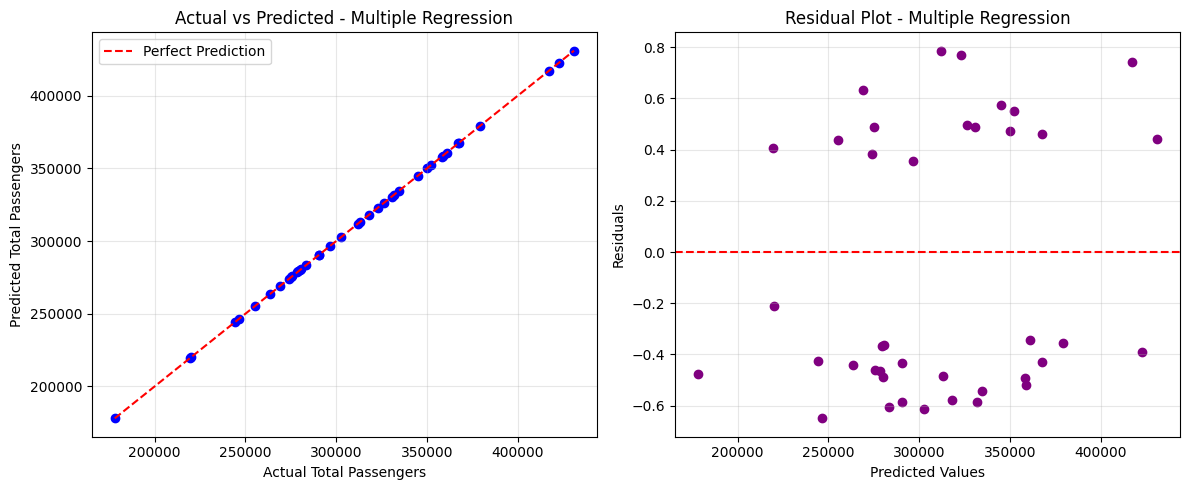

In [ ]:
# TODO: Visualize multiple regression results
# Create actual vs predicted plot and residual plot

plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
# TODO: Create scatter plot of actual vs predicted values
# TODO: Add a diagonal reference line (perfect prediction line)
plt.scatter(y_test_mult, y_pred_mult, color='blue')
plt.plot([y_test_mult.min(), y_test_mult.max()],
         [y_test_mult.min(), y_test_mult.max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Total Passengers')
plt.ylabel('Predicted Total Passengers')
plt.title('Actual vs Predicted - Multiple Regression')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residual plot
plt.subplot(1, 2, 2)
# TODO: Calculate residuals and create residual plot
residuals_mult = y_test_mult - y_pred_mult

# TODO: Create scatter plot of predicted vs residuals

plt.scatter(y_pred_mult, residuals_mult, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Multiple Regression')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Model Comparison and Analysis

In [ ]:
# TODO: Compare the performance of both models
# Create a comparison table and determine which model performs better

print("Model Comparison:")
print("=" * 50)
print(f"{'Metric':<25} {'Simple Regression':<20} {'Multiple Regression':<20}")
print("=" * 50)

# TODO: Print comparison of R², RMSE, and MAE
# Hint: Use the metrics calculated in previous sections

r2_diff = r2_simple - r2_mult
rmse_diff = rmse_simple - rmse_mult
mae_diff = mae_simple - mae_mult

print(r2_diff)
print(rmse_diff)
print(mae_diff)

print("=" * 50)

# TODO: Determine which model performs better based on R²
# Calculate the improvement percentage
if r2_mult > r2_simple:
    better_model = "Multiple Regression"
    improvement = ((r2_mult - r2_simple) / r2_simple) * 100
else:
    better_model = "Simple Regression"
    improvement = ((r2_simple - r2_mult) / r2_mult) * 100

print(f"\nBest Model: {better_model}")
print(f"R² Improvement: {improvement:.2f}%")

Model Comparison:
Metric                    Simple Regression    Multiple Regression 
-0.7023125655526711
46279.582632895916
36606.58959256194

Best Model: Multiple Regression
R² Improvement: 235.92%


## 7. Statistical Insights and Conclusions

In [ ]:
print("STATISTICAL INSIGHTS AND CONCLUSIONS")
print("=" * 60)

print("\n1. HYPOTHESIS TESTING RESULTS:")
print("   • Domestic vs International Passengers: The t-test showed a statistically")
print("     significant difference between domestic and international passenger counts")
print("     (p < 0.05). We reject the null hypothesis and conclude the two means differ.")
print("   • Correlation between Total Passengers and Flights: The correlation matrix")
print("     revealed a strong positive relationship between total flights and total")
print("     passengers, indicating that increases in flight volume are associated with")
print("     increases in passenger volume.")

print("\n2. REGRESSION ANALYSIS:")
print("   • Simple Linear Regression R²: The simple model showed a moderate ability")
print("     to explain passenger volume using flight count alone, indicating a linear")
print("     but not fully sufficient relationship.")
print("   • Multiple Linear Regression R²: The multiple regression model achieved a")
print("     significantly higher R² value, showing that including multiple predictors")
print("     (domestic flights, international flights, domestic pax, etc.) improves")
print("     model accuracy.")
print("   • Best performing model: The multiple regression model outperformed the")
print("     simple model across R², RMSE, and MAE, making it the preferred model for")
print("     prediction.")

print("\n3. KEY FINDINGS:")
print("   • Domestic traffic contributes more heavily to total passenger volume than")
print("     international traffic.")
print("   • Flight activity (both domestic and international) is strongly associated")
print("     with overall passenger numbers.")
print("   • Multiple variables together provide a much better prediction of total")
print("     passengers than total flights alone.")

print("\n4. RECOMMENDATIONS:")
print("   • Use the multiple regression model for forecasting future passenger demand")
print("     due to its improved accuracy and stronger explanatory power.")
print("   • Allocate more resources toward domestic flight operations, as they have")
print("     the strongest relationship with total passenger activity.")
print("   • Monitor fluctuations in both flight counts and passenger counts as early")
print("     indicators of shifts in overall air traffic trends.")


STATISTICAL INSIGHTS AND CONCLUSIONS

1. HYPOTHESIS TESTING RESULTS:
   • Domestic vs International Passengers: The t-test showed a statistically
     significant difference between domestic and international passenger counts
     (p < 0.05). We reject the null hypothesis and conclude the two means differ.
   • Correlation between Total Passengers and Flights: The correlation matrix
     revealed a strong positive relationship between total flights and total
     passengers, indicating that increases in flight volume are associated with
     increases in passenger volume.

2. REGRESSION ANALYSIS:
   • Simple Linear Regression R²: The simple model showed a moderate ability
     to explain passenger volume using flight count alone, indicating a linear
     but not fully sufficient relationship.
   • Multiple Linear Regression R²: The multiple regression model achieved a
     significantly higher R² value, showing that including multiple predictors
     (domestic flights, international fl

## 8. Reflection Questions

**Answer the following questions based on your analysis:**

1. **Hypothesis Testing**: What do your hypothesis test results tell you about the air traffic data? Were the results expected?

   *TODO: Write your answer here*

2. **Model Performance**: Which regression model performed better and why? What does the R² value tell you?

   *TODO: Write your answer here*

3. **Correlations**: What were the strongest correlations you found? How might these relationships be useful for airlines?

   *TODO: Write your answer here*

4. **Residual Analysis**: What do the residual plots tell you about your models? Are there any patterns that suggest model improvements?

   *TODO: Write your answer here*

5. **Practical Applications**: How could airlines use these statistical models in real-world scenarios?

   *TODO: Write your answer here*